<a href="https://colab.research.google.com/github/raghav1674/Apache-log2Elasticformat/blob/master/USA_HOUSE_PREDICTION_USING_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Loading data

In [125]:
df=pd.read_csv(r'/content/kc_house_data.csv')

In [126]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## EXPLORATORY DATA ANALYSIS

In [127]:
import seaborn as sns


In [128]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [129]:
df.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

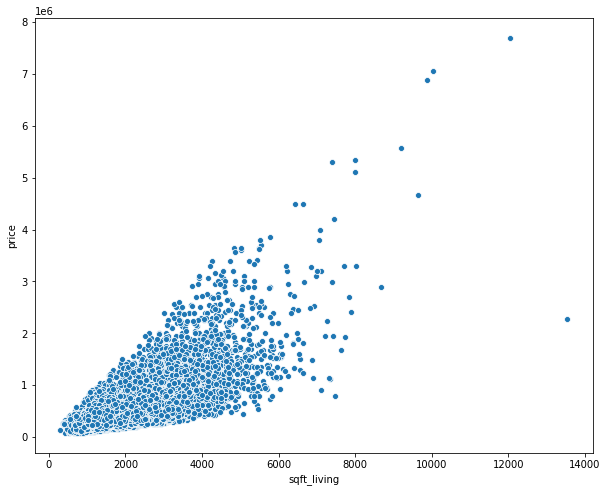

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="sqft_living",y='price',data=df )

In [131]:
y=df["price"].values

In [132]:
df["yr_renovated"]

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [133]:
df=df.drop('yr_renovated',axis=1)

In [146]:
# df[df["bedrooms"]==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15870,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,98103,47.6878,-122.331,1330,4700


In [135]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [136]:
df = df.drop("id",axis=1)

(-1.0, 35.0)

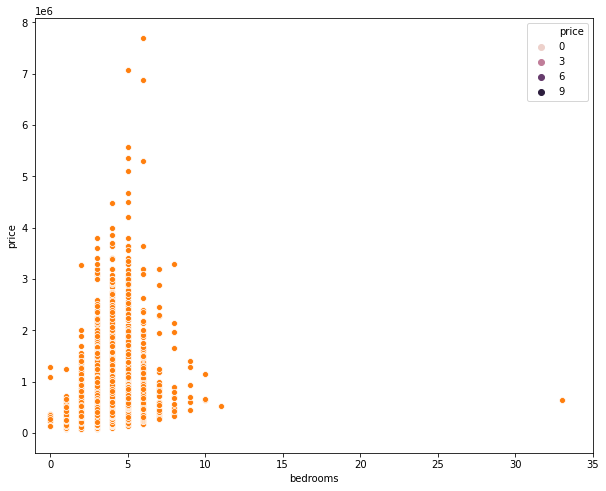

In [145]:
# df=pd.read_csv(r"/content/district wise population and centroids.csv")
plt.figure(figsize=(10,8))
sns.scatterplot(x="long",y="lat",data=df,hue="price")
# edgecolor=None,alpha=0.7,palette="RdYlGn")
sns.scatterplot(x='bedrooms',y="price",data=df, palette="RdYlGn")
plt.xlim(-1,35)

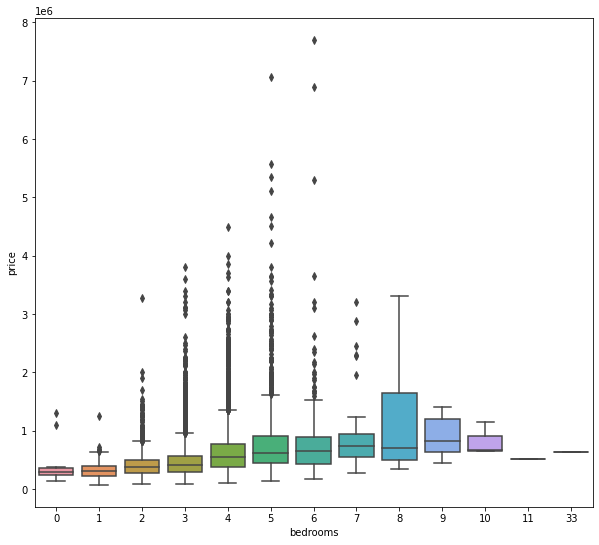

In [107]:
plt.figure(figsize=(10,9))

sns.boxplot(x='bedrooms',y="price",data=df)

In [16]:
df["price"].sort_values(ascending=False)

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

In [17]:
df["price"].value_counts().sort_values()

280400.0      1
109500.0      1
308130.0      1
406430.0      1
504975.0      1
           ... 
425000.0    150
500000.0    152
550000.0    159
350000.0    172
450000.0    172
Name: price, Length: 4028, dtype: int64

In [18]:
no_top=df.sort_values("price").iloc[int(len(df)*0.01):]


In [19]:
no_top

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
14477,20150318T000000,153500.0,3,1.00,890,4810,1.0,0,0,3,6,890,0,1910,98118,47.5153,-122.266,1230,6057
3275,20141009T000000,153503.0,2,2.50,1240,3649,2.0,0,0,3,7,1240,0,1986,98003,47.3241,-122.322,1400,3721
4768,20140909T000000,154000.0,2,1.00,1040,20524,1.0,0,3,3,6,1040,0,1949,98014,47.6981,-121.875,1880,38996
15976,20141016T000000,154000.0,3,3.00,1530,9997,1.0,0,0,3,6,1020,510,1992,98001,47.2861,-122.252,1410,9997
8087,20150106T000000,154200.0,4,1.00,1310,8640,1.0,0,0,3,6,910,400,1948,98146,47.5104,-122.342,1310,8640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,98004,47.6232,-122.220,4600,21750
4411,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,98039,47.6289,-122.233,3560,24345
9254,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,98039,47.6305,-122.240,4540,42730
3914,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,98004,47.6500,-122.214,3930,25449


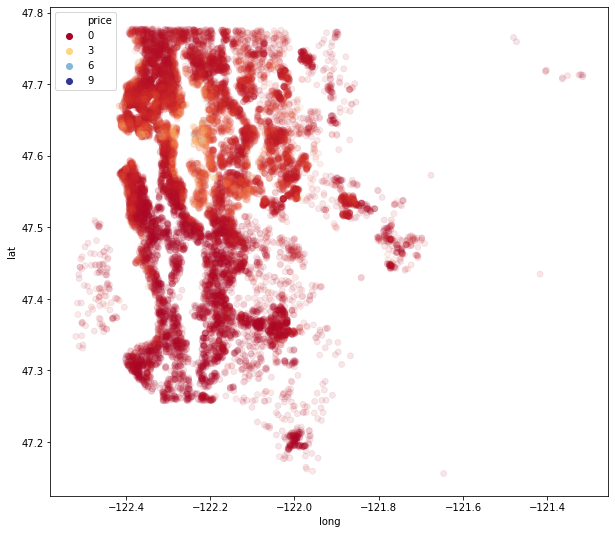

In [140]:
plt.figure(figsize=(10,9))
sns.scatterplot(x="long",y="lat",data=no_top,hue="price",edgecolor=None,alpha=0.1,palette="RdYlBu")

## FEATURE ENGINEERING

In [21]:
df["date"]=pd.to_datetime(df["date"])

In [22]:
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [23]:
df["month"]=df["date"].apply(lambda x:x.month)
df["year"]=df["date"].apply(lambda x:x.year)

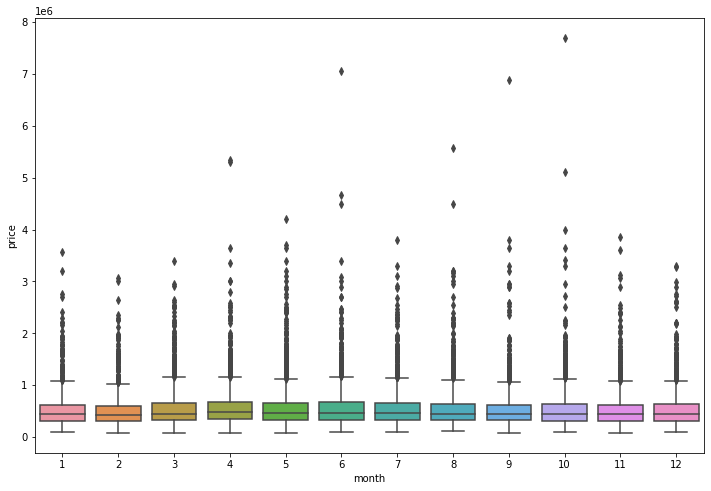

In [106]:
plt.figure(figsize=(12,8))
sns.boxplot(x="month",y="price",data=df)

In [25]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,5,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,2,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,6,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,1,2015


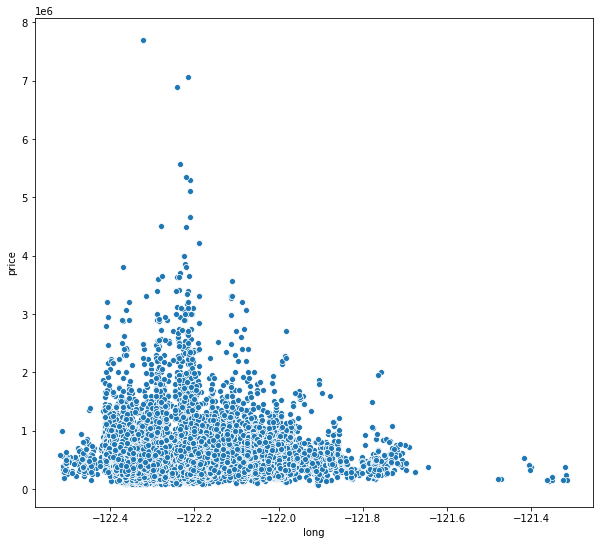

In [26]:
plt.figure(figsize=(10,9))
sns.scatterplot(x="long",y="price",data=df)

In [27]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,5,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,2,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,6,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,1,2015


In [28]:
df["sqft_basement"]
X=df.drop("date",axis=1)

In [29]:
from sklearn.feature_selection import VarianceThreshold

In [30]:
sel=VarianceThreshold(threshold=0.01)

In [31]:
sel.fit(X,y)

VarianceThreshold(threshold=0.01)

In [32]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [33]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year'],
      dtype='object')

In [34]:
X=X.drop(["price","condition"],axis=1)

In [35]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,5,2014
21609,4,2.50,2310,5813,2.0,0,0,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,2,2015
21610,2,0.75,1020,1350,2.0,0,0,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,6,2014
21611,3,2.50,1600,2388,2.0,0,0,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,1,2015


## CREATING THE ANN  MODEL FOR OUR REGRESSION PROBLEM

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [43]:
model=Sequential()
len(X.columns)


18

In [44]:
model.add(Dense(units=len(X.columns),activation='relu',input_dim=18))

In [45]:
model.add(Dense(units=len(X.columns),activation='relu'))
model.add(Dense(units=len(X.columns),activation='relu'))
model.add(Dense(units=len(X.columns),activation='relu'))
model.add(Dense(units=len(X.columns),activation='relu'))
model.add(Dense(units=1))

In [46]:
model.compile(optimizer="adam", loss="mse")

In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=120,epochs=400)

Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 0s 23us/step - loss: 423536062174.0392 - val_loss: 432289271785.2585
Epoch 2/400
15129/15129 [==============================] - 0s 14us/step - loss: 400242461512.2364 - val_loss: 335991876179.0697
Epoch 3/400
15129/15129 [==============================] - 0s 14us/step - loss: 185426294975.6827 - val_loss: 78457062684.9007
Epoch 4/400
15129/15129 [==============================] - 0s 13us/step - loss: 70322211546.8919 - val_loss: 60694058319.4374
Epoch 5/400
15129/15129 [==============================] - 0s 14us/step - loss: 58902303217.8878 - val_loss: 53664441004.7724
Epoch 6/400
15129/15129 [==============================] - 0s 13us/step - loss: 52637771206.2312 - val_loss: 48813873072.4047
Epoch 7/400
15129/15129 [==============================] - 0s 15us/step - loss: 48274341777.1327 - val_loss: 44949353684.8859
Epoch 8/400
15129/15129 [==============================] - 0s 13

## EVALUATING MODEL 

In [48]:
loss=pd.DataFrame(model.history.history)

<Figure size 720x648 with 0 Axes>

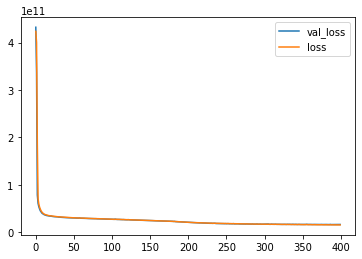

In [49]:
plt.figure(figsize=(10,9))
loss.plot()


In [103]:
(model.evaluate(X_test,y_test)**0.5)/5.400881e+05

# df["price"].describe()


6484/6484 [==============================] - 0s 17us/step


0.23649113025259627

In [101]:
((model.evaluate(X_train,y_train))**0.5)/5.400881e+05



15129/15129 [==============================] - 0s 16us/step


0.2292682442293301

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [53]:
model_predictions=model.predict(X_test)

In [54]:
mean_squared_error(y_test,model_predictions)**0.5

127726.04539774108

In [55]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [56]:
5.400881e+05


540088.1

In [57]:
(540088.1-129383.3796378397)/(540088.1)

0.7604402325512455

In [58]:
new_one=X_train[0].reshape(18,)
new_one.shape
model.predict(X_train)

array([[468165.72],
       [438029.06],
       [464463.03],
       ...,
       [278314.84],
       [453996.75],
       [308148.56]], dtype=float32)

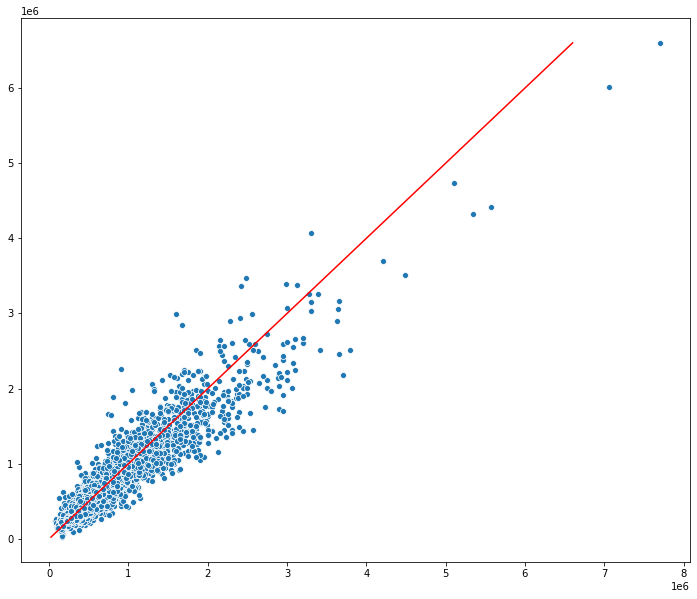

In [59]:
plt.figure(figsize=(12,10))
sns.scatterplot(y_train,model.predict(X_train).reshape(-1,))
sns.lineplot(model.predict(X_train).reshape(-1,),model.predict(X_train).reshape(-1,),color="red")


In [60]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,5,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,2,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,6,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,1,2015


## PREDICTING THE NEW INPUT 

In [61]:
df.iloc[0]

date             2014-10-13 00:00:00
price                         221900
bedrooms                           3
bathrooms                          1
sqft_living                     1180
sqft_lot                        5650
floors                             1
waterfront                         0
view                               0
condition                          3
grade                              7
sqft_above                      1180
sqft_basement                      0
yr_built                        1955
zipcode                        98178
lat                          47.5112
long                        -122.257
sqft_living15                   1340
sqft_lot15                      5650
month                             10
year                            2014
Name: 0, dtype: object

In [62]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,5,2014
21609,4,2.50,2310,5813,2.0,0,0,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,2,2015
21610,2,0.75,1020,1350,2.0,0,0,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,6,2014
21611,3,2.50,1600,2388,2.0,0,0,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,1,2015


In [63]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'year'],
      dtype='object')

In [84]:
one_house=X.iloc[1].values.reshape(-1,18)
one_house=scaler.transform(one_house)


In [85]:
explained_variance_score(y_test,model_predictions)

0.8844971823411182

In [86]:
model.predict(one_house)

array([[488039.56]], dtype=float32)

In [83]:
y[1]

538000.0